# UK Migration

## From Excel Data

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load the Excel file
excel_file = pd.ExcelFile("../../data/ltimspreadsheetnov2024finalv2.xlsx")

# See all sheet names
sheet_names = excel_file.sheet_names

print(sheet_names)


['Cover_sheet', 'Contents', 'Definitions', 'Notes', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9']


In [23]:
# get data frames fro different sheets within file
dfs = {sheet: excel_file.parse(sheet) for sheet in excel_file.sheet_names}

In [24]:
print(dfs.keys())

dict_keys(['Cover_sheet', 'Contents', 'Definitions', 'Notes', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9'])


In [25]:
print(dfs["Table 1"])

    Table 1: Long-term international migration into and out of the United Kingdom by nationality,  \
0    using new approach to producing migration esti...                                              
1                   This worksheet contains one table.                                              
2    Notes and definitions are referred to in this ...                                              
3    Some shorthand is used in this table, P = prov...                                              
4                                       Flow\n[note 2]                                              
..                                                 ...                                              
147                                      Net migration                                              
148                                      Net migration                                              
149                                      Net migration                                     

In [26]:
# Load the Excel file, specifying header row (row 5 = index 4)
df_raw = pd.read_excel("../../data/ltimspreadsheetnov2024finalv2.xlsx", sheet_name="Table 1", header=5)

# Drop any completely empty rows
df_clean = df_raw.dropna(how='all')

# Optionally: clean column names
df_clean.columns = [col.split('\n')[0].strip() if isinstance(col, str) else col for col in df_clean.columns]

# Preview cleaned data
print(df_clean.head())

          Flow     Period  All Nationalities  British     EU+  Non-EU+
0  Immigration  YE Jun 12             639000    74000  327000   238000
1  Immigration  YE Sep 12             630000    76000  322000   232000
2  Immigration  YE Dec 12             643000    79000  334000   230000
3  Immigration  YE Mar 13             649000    75000  350000   224000
4  Immigration  YE Jun 13             669000    75000  373000   222000


In [27]:
#
df_clean.rename(columns={
    "Period": "Date",
    "All Nationalities": "All",
    # add more renames as needed
}, inplace=True)
df_clean.head()

,Flow,Date,All,British,EU+,Non-EU+
0,Immigration,YE Jun 12,639000,74000,327000,238000
1,Immigration,YE Sep 12,630000,76000,322000,232000
2,Immigration,YE Dec 12,643000,79000,334000,230000
3,Immigration,YE Mar 13,649000,75000,350000,224000
4,Immigration,YE Jun 13,669000,75000,373000,222000


In [28]:
df_clean.describe()

,All,British,EU+,Non-EU+
count,1.470000e+02,147.000000,147.000000,1.470000e+02
mean,5.672109e+05,51170.068027,225918.367347,2.901429e+05
std,2.826294e+05,87132.034446,139768.669457,2.842926e+05
min,3.500000e+04,-94000.000000,-140000.000000,5.400000e+04
25%,3.675000e+05,-52000.000000,141500.000000,1.330000e+05
50%,5.230000e+05,76000.000000,229000.000000,1.790000e+05
75%,7.580000e+05,116500.000000,294000.000000,2.605000e+05
max,1.320000e+06,165000.000000,521000.000000,1.122000e+06


In [30]:
# group by flow 
# Assuming df_clean has a 'Flow' column
grouped_dfs = {flow: group_df.reset_index(drop=True) 
               for flow, group_df in df_clean.groupby("Flow")}

print(grouped_dfs.keys())

dict_keys(['Emigration', 'Immigration', 'Net migration'])


In [32]:
# Step 1: Filter for Net Migration
net_df = df_clean[df_clean["Flow"] == "Net migration"].copy()

# Step 2: Parse the "Period" into datetime
# Simplified parsing assuming format like "YE Jun 24 P"
def parse_period(p):
    parts = p.split()
    if len(parts) < 3:
        return pd.NaT
    month = parts[1]
    year = int("20" + parts[2]) if len(parts[2]) == 2 else int(parts[2])
    return pd.to_datetime(f"01 {month} {year}", format="%d %b %Y")

net_df["Date"] = net_df["Date"].apply(parse_period)

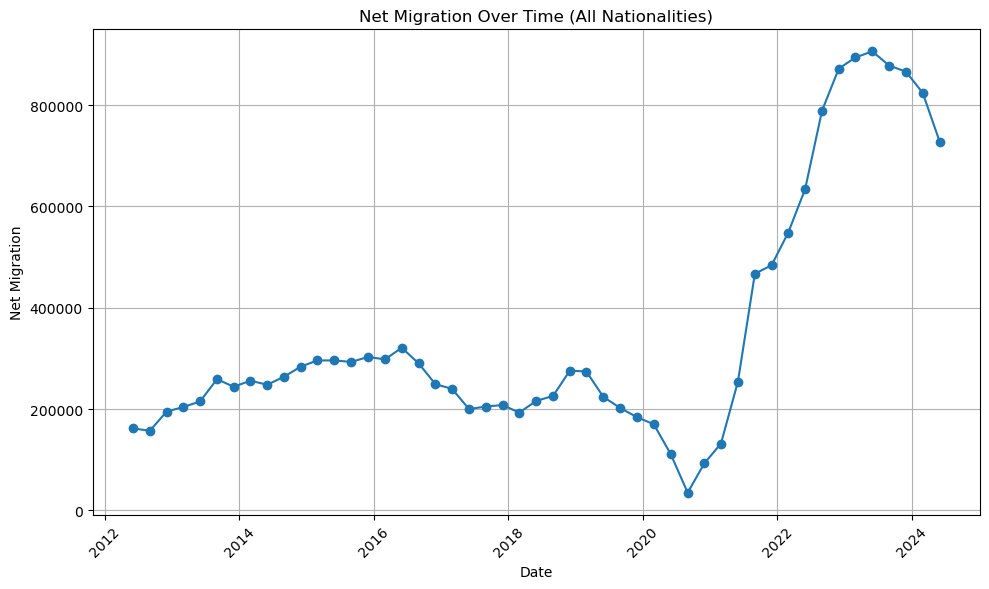

In [33]:
# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.plot(net_df["Date"], net_df["All"], marker="o")
plt.title("Net Migration Over Time (All Nationalities)")
plt.xlabel("Date")
plt.ylabel("Net Migration")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

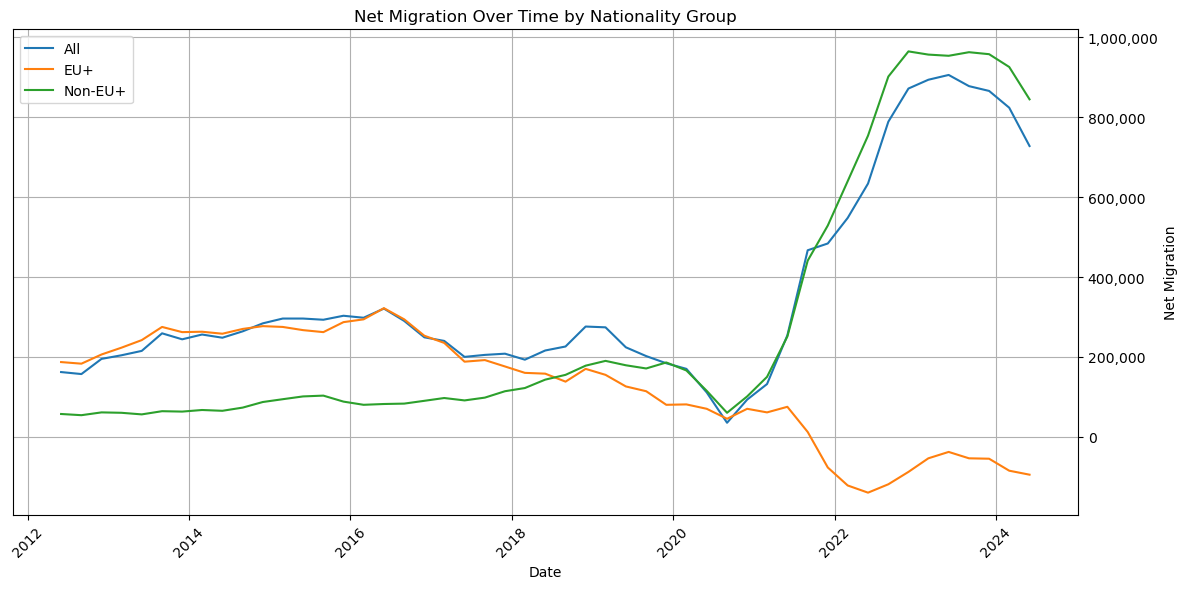

In [46]:
from matplotlib.ticker import StrMethodFormatter
# Step 3: Sort by date
net_df = net_df.sort_values("Date")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for col in ["All", "EU+", "Non-EU+"]:
    ax.plot(net_df["Date"], net_df[col], label=col)

# Move y-axis label and ticks to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel("Net Migration")
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel("Date")
ax.set_title("Net Migration Over Time by Nationality Group")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# # Filter for 2020 and 2024 rows
# row_2020 = net_df[net_df["Date"].dt.year == 2020].sort_values("Date").tail(1)
# row_2024 = net_df[net_df["Date"].dt.year == 2024].sort_values("Date").tail(1)

# # Get values
# val_2020 = row_2020["Non-EU+"].values[0]
# val_2024 = row_2024["Non-EU+"].values[0]
# pct_change = (val_2024 - val_2020) / val_2020 * 100

# Extract dates and values
date_2020 = row_2020["Date"].values[0]
date_2024 = row_2024["Date"].values[0]
val_2024 = row_2024["Non-EU+"].values[0]
pct_change = (val_2024 - row_2020["Non-EU+"].values[0]) / row_2020["Non-EU+"].values[0] * 100

# Print it
print(f"Non-EU+ net migration change from 2020 to 2024: {pct_change:+.1f}%")



Non-EU+ net migration change from 2020 to 2024: +736.6%


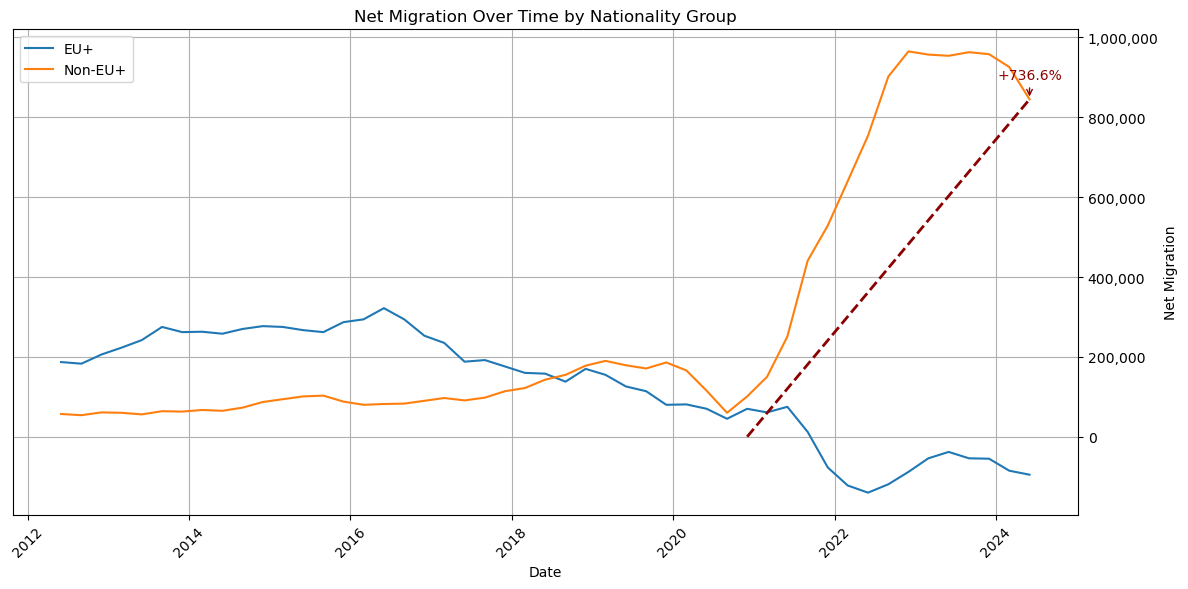

In [62]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for col in ["EU+", "Non-EU+"]:
    ax.plot(net_df["Date"], net_df[col], label=col)

# Move y-axis label and ticks to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel("Net Migration")
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel("Date")
ax.set_title("Net Migration Over Time by Nationality Group")
ax.legend()
ax.grid(True)

# Plot the line from 0 at 2020 to 2024 value
ax.plot([date_2020, date_2024], [0, val_2024], color="darkred", linestyle="--", linewidth=2, label="Change 2020–2024 (Non-EU+)")

# Annotate the % at 2024
ax.annotate(f"{pct_change:+.1f}%", 
            xy=(date_2024, val_2024), 
            xytext=(date_2024, val_2024 + 50000), 
            ha='center',
            fontsize=10,
            color="darkred",
            arrowprops=dict(arrowstyle="->", color="darkred"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()